In [183]:
############################################################################
# EDA means dealing with missing values, incorrect data types
#and outliers. Techniques to handle these issues.
#It is important to deal with missing data before starting your analysis.
############################################################################

########################################
# Initial exploration
########################################
import warnings
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd 
salaries = pd.read_csv("datasets/ds_salaries_clean.csv")
salaries.dtypes

Working_Year              int64
Designation              object
Experience               object
Employment_Status        object
Employee_Location        object
Company_Size             object
Remote_Working_Ratio      int64
Salary_USD              float64
dtype: object

Index(['Executive', 'Senior', 'Mid', 'Entry'], dtype='object', name='Experience')


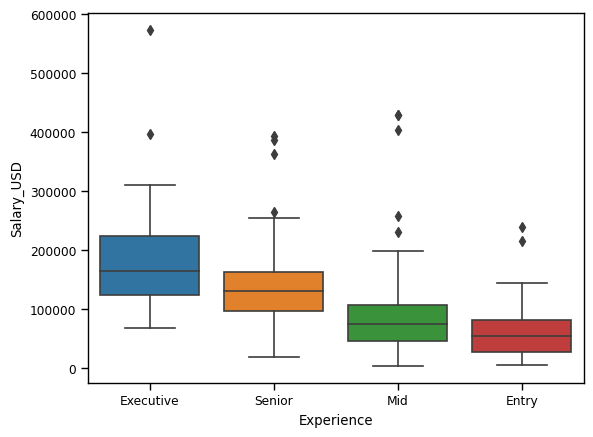

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

my_order = salaries.groupby("Experience")["Salary_USD"].median().sort_values(ascending=True).iloc[::-1].index
print(my_order)
sns.boxplot(data=salaries, x="Experience", y="Salary_USD", order=my_order)
plt.show()

# with some missing values the boxplots would have been a little different ...

In [185]:
#to avois warning message
pd.reset_option("mode.chained_assignment")

import numpy as np
salaries = pd.read_csv("datasets/ds_salaries_clean.csv")

#Check for missing values
#shows all columns with missing values
print(salaries.isna().sum())

#salaries.shape
###########################
#Insert missing values
###########################
display(salaries.head())
salaries.loc[1:13, "Working_Year"]=np. nan
salaries.loc[14:41, "Designation"]=np. nan
salaries.loc[42:75, "Experience"]=np. nan
salaries.loc[76:106, "Employment_Status"]=np. nan
salaries.loc[107:135, "Employee_Location"]=np. nan
salaries.loc[136:176, "Company_Size"]=np. nan
salaries.loc[177:201, "Remote_Working_Ratio"]=np. nan
salaries.loc[202:262, "Salary_USD"]=np. nan

display(salaries.head())
print(salaries.isna().sum())

############################################
#Dropping missing values if they amount to 
#5% or less of all values
############################################
threshold=len(salaries)*0.05
print("\n")
print(threshold)
print("\n")

cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print(cols_to_drop)
salaries.dropna(subset=cols_to_drop,inplace=True)
print(salaries.isna().sum())

############################################
#Imputing a summary statistic
#for columns with 5% or more of all values
############################################
print("\n")
cols_with_missing_values = salaries.columns[salaries.isna().sum() >0]
print(cols_with_missing_values)

for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0], inplace = True)
print(salaries.isna().sum())  

############################################
#Imputing by sub-group
#for the last column
############################################
print("\n")
salaries_dict = salaries.groupby("Experience")["Salary_USD"].median().to_dict()
print(salaries_dict)
salaries["Salary_USD"] = salaries["Salary_USD"].fillna(salaries["Experience"].map(salaries_dict))
print(salaries.isna().sum()) 

#No more missing values!

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020.0,Data Scientist,Mid,FT,DE,L,0.0,76227.0
1,NaN,Machine Learning Scientist,Senior,FT,JP,S,0.0,248257.0
2,NaN,Big Data Engineer,Senior,FT,GB,M,50.0,104100.0
3,NaN,Product Data Analyst,Mid,FT,HN,S,0.0,19097.0
4,NaN,Machine Learning Engineer,Senior,FT,US,L,50.0,143225.0


Working_Year            13
Designation             28
Experience              34
Employment_Status       31
Employee_Location       29
Company_Size            41
Remote_Working_Ratio    25
Salary_USD              61
dtype: int64


30.35


Index(['Working_Year', 'Designation', 'Employee_Location',
       'Remote_Working_Ratio'],
      dtype='object')
Working_Year             0
Designation              0
Experience              34
Employment_Status       31
Employee_Location        0
Company_Size            41
Remote_Working_Ratio     0
Salary_USD              61
dtype: int64


Index(['Experience', 'Employment_Status', 'Company_Size', 'Salary_USD'], dtype='object')
Working_Year             0
Designation              0
Experience               0
Employment_Status        0
Employee_Location        0
Company_Size             0
Remote_Working_Ratio     0
Salary_USD              61
dtype: int64


{'Entry': 61506.0, 'Executive': 163694.5, 'Mid': 75232.0, 'Senior': 126344.0}
Working_Year       

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: Designation, dtype: int64


50
                 Designation  Number of Professionals
0             Data Scientist                      143
1              Data Engineer                      132
2               Data Analyst                       97
3  Machine Learning Engineer                       41
4         Research Scientist                       16


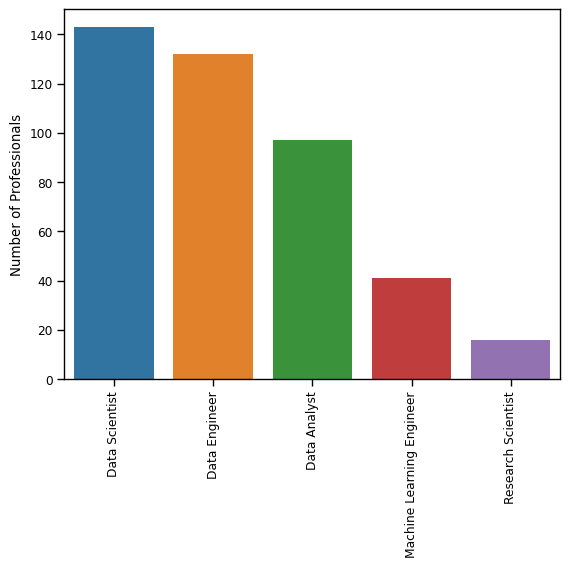

In [186]:
############################################
#Analyzing categorical data
############################################
print("\n")
salaries = pd.read_csv("datasets/ds_salaries_clean.csv")
#preview categorical values
display(salaries.select_dtypes("object").head(5))
#Frequency of values
print(salaries["Designation"].value_counts().head())
print("\n")
#count how many unique job titles there are
print(salaries["Designation"].nunique())

#Top 5 most common designation job title
toto=salaries["Designation"].value_counts().head()
toto=list(zip(toto.index, toto[0:6]))
df = pd.DataFrame(toto, columns=['Designation', 'Number of Professionals'])
print(df)
sns.barplot(data=df, x='Designation', y='Number of Professionals')
plt.xticks(rotation=90)
plt.xlabel("")
plt.show()



0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

0       True
1      False
2      False
3      False
4      False
       ...  
602     True
603     True
604     True
605     True
606    False
Name: Designation, Length: 607, dtype: bool

                  Designation      Job_Category
0              Data Scientist      Data Science
1  Machine Learning Scientist  Machine Learning
2           Big Data Engineer  Data Engineering
3        Product Data Analyst    Data Analytics
4   Machine Learning Engineer  Machine Learning


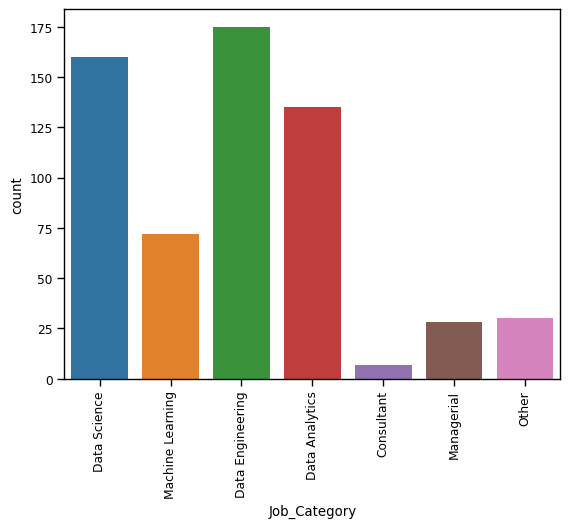

In [204]:
############################################
#Extracting value from categories
#Search a column for a specific string
#or multiple strings
############################################
#Which job title have Scientist in them
display(salaries["Designation"].str.contains("Scientist"))

#filter for rows containing one or more phrases?
#find job titles containing either MachineLearning or Ai
display(salaries["Designation"].str.contains("Machine Learning|AI"))

#filter for job titles that start with a specific phrase such as "Data"
display(salaries["Designation"].str.contains("^Data"))

#Define a list of job titles to find
job_categories = ["Data Science", "Data Analytics", "Data Engineering", "Machine Learning", "Managerial", "Consultant"]
data_science = "Data Scientist|NLP"                  
data_analyst = "Analyst|Analytics"   
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

conditions  = [ (salaries["Designation"].str.contains(data_science)),
                (salaries["Designation"].str.contains(data_analyst)),
                (salaries["Designation"].str.contains(data_engineer)),
                (salaries["Designation"].str.contains(ml_engineer)),
                (salaries["Designation"].str.contains(manager)),
                (salaries["Designation"].str.contains(consultant))]
salaries["Job_Category"] = np.select(conditions, job_categories, default="Other")
print(salaries[["Designation","Job_Category"]].head())                 
sns.set_context("paper")
sns.countplot(data=salaries, x="Job_Category")  
plt.xticks(rotation=90)
#plt.xlabel("")
plt.show()


In [203]:
#################################################
# Relative frequency and crosstab
# are the data representative of the population
#################################################
# Print the relative frequency of Job_Category
print(salaries["Job_Category"].value_counts(normalize=True))
#Cross-tabulation helps identify how observations occur in combination
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))
#Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))
#Thandy function to examine the combination of frequencies, as well as find aggregated statistics.

Data Engineering    0.288303
Data Science        0.263591
Data Analytics      0.222405
Machine Learning    0.118616
Other               0.049423
Managerial          0.046129
Consultant          0.011532
Name: Job_Category, dtype: float64
Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22
Company_Size       L    M   S
Job_Category                 
Consultant         3    1   3
Data Analytics    32   91  12
Data Engineering  54  107  14
Data Science      56   81  23
Machine Learning  25   25  22
Managerial        14   11   3
Other             14   10   6
Company_Size                  L              M             S
Job_Category                                                
Consultant         77553.000000    5449.000000  75296.333333
Data Analytics    102997.125000   98125.835165  43074.500000
Data Engineering  113829.888

count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64


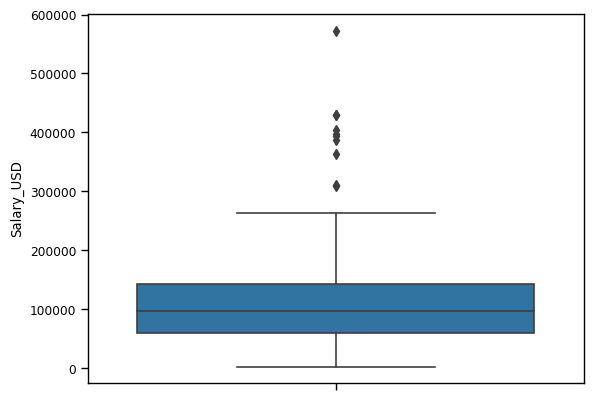

83332.0
268223.0 -65105.0


,Experience,Employee_Location,Salary_USD
25,Executive,US,310321.0
33,Mid,US,429675.0
63,Senior,US,393392.0
97,Mid,US,429675.0
157,Mid,US,403895.0
225,Executive,US,397211.0
252,Executive,US,572900.0
482,Executive,US,309366.0
519,Senior,US,362837.0
523,Senior,US,386708.0


count       597.000000
mean     102328.480737
std       55910.790653
min        2730.000000
25%       59819.000000
50%       95483.000000
75%      141565.000000
max      263534.000000
Name: Salary_USD, dtype: float64


In [188]:
###########################
#Handling OUTLIERS
###########################
import seaborn as sns
import matplotlib.pyplot as plt
salaries = pd.read_csv("datasets/ds_salaries_clean.csv")

#1 Using descriptive statistic
print(salaries["Salary_USD"].describe())
#the maximum salary is more than four times the mean and median.

#2 Using IQR
sns.set_context("paper")
sns.boxplot(data=salaries, y="Salary_USD")
plt.show()
#75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
#25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)
#IQR
salaries_iqr = seventy_fifth - twenty_fifth
print(salaries_iqr)

#3 Identify Outliers
#upper threshold
upper = seventy_fifth + (1.5 * salaries_iqr)
#lower threshold
lower = twenty_fifth - (1.5 * salaries_iqr)
print(upper, lower)

#Values outside the limits - subsetting data
display(salaries[ (salaries["Salary_USD"] < lower) | (salaries["Salary_USD"] > upper) ] \
        [["Experience", "Employee_Location", "Salary_USD"]])

#Dropping outliers
no_outliers = salaries[ (salaries["Salary_USD"] > lower) & (salaries["Salary_USD"] < upper) ]
print(no_outliers["Salary_USD"].describe())
#Now descriptive statistics shows ten fewer values, 
#a mean that is 5000 dollars less than before, and a much lower maximum salary



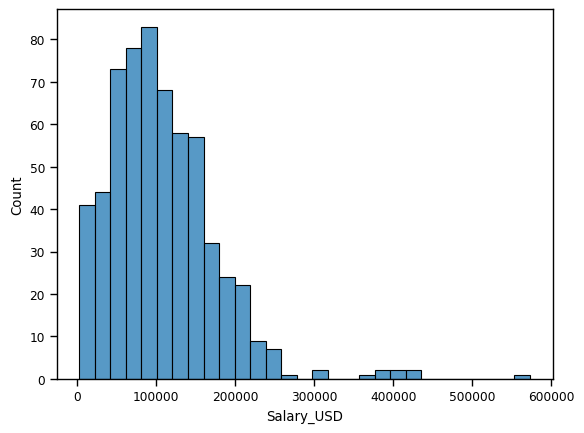

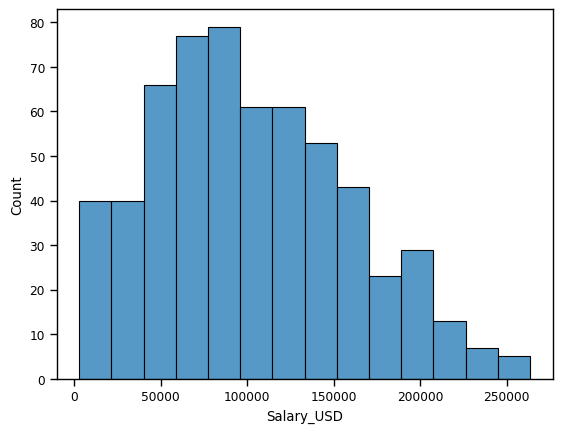

In [189]:
#Distribution of salaries
#and impact of removing outliers
sns.set_context("paper")
sns.histplot(data=salaries, x="Salary_USD")
plt.show()
#distribution is right-skewed by the upper outlier
sns.histplot(data=no_outliers, x="Salary_USD")
plt.show()
#distribution is less skewed and looks more like a normal distribution


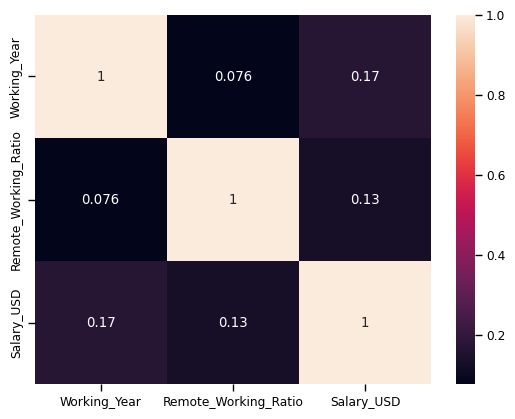

59893.0 96982.0 143225.0


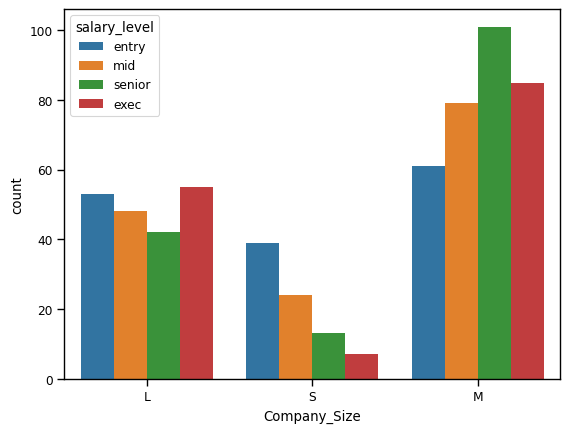

In [211]:
#################################
# Generating new features
#################################
#1 Extracting features for correlation
#extract datetime attributes from date_of_response 
#and then create a heat map to visualize the correlation coefficients between variables.

# Create a heatmap
sns.heatmap(salaries.corr(), annot=True)
plt.show()
#Looks like there aren't any meaningful relationships between the numeric variables, 
#let's see if converting numeric data into classes offers additional insights

#Calculating salary percentiles
#conversion of numeric data into categories sometimes makes it easier to identify patterns.

#convert the "Salary_USD" column into categories based on its percentiles.
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)
# Save the median
salaries_median = salaries["Salary_USD"].median()
# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

#Looks like the interquartile range is between 59893 and 143225 dollars!
#let's use these variables to add a categorical salary column into the DataFrame!
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)
# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()
#By using pd.cut() to split out numeric data into categories, 
#we can see that a large proportion of workers at small companies get paid "entry" level salaries, 
#while more staff at medium-sized companies are rewarded with "senior" level salary.
#last phase:generating hypotheses

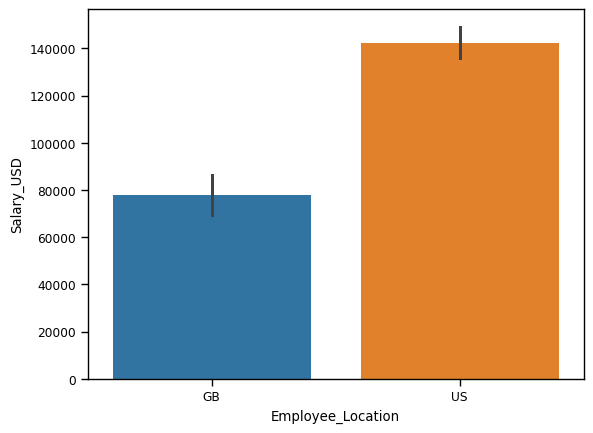

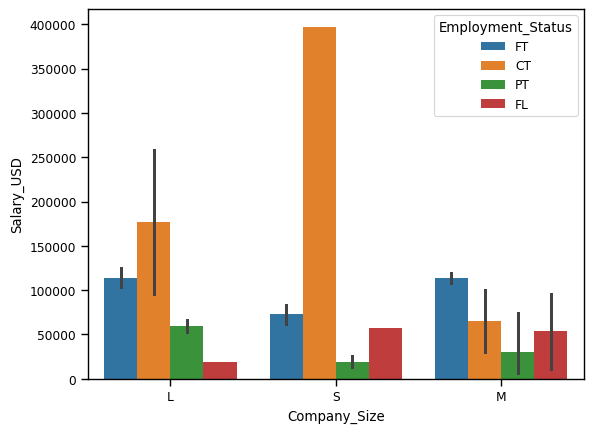

In [213]:
################################
# Generating hypothesis
################################
#Exploratory data analysis is a crucial step in generating hypotheses!
#You've had an idea you'd like to explore
#do data professionals get paid more in the USA than they do in Great Britain?
#You'll need to subset the data by "Employee_Location" and 
#produce a plot displaying the average salary between the two groups.

### Comparing salaries
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

#By subsetting the data you were able to directly compare salaries between the USA and Great Br
#The visualization suggests you've generated a hypothesis 
#that is worth formally investigating to determine whether a real difference exists or not!

#visualizations are used to generate hypotheses, making them a crucial part of exploratory data analysis!

######################################################################################################
####generate a bar plot to inspect how salaries differ based on company size and employment status
######################################################################################################
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()

#What is a reasonable hypothesis to generate based on this plot?
On average, large companies payed ... 